In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlub-housing-house-prediction-linearregression/train_set.csv
/kaggle/input/mlub-housing-house-prediction-linearregression/test_set.csv
/kaggle/input/mlub-housing-house-prediction-linearregression/sampleSubmission.csv


## Session 3 - Train a REGRESSION Model

## SETUP


First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Linear Regression

Linear regression is a simple technique that is useful for predicted problems.

linear regression pros:
* widely used
+ runs fast
+ easy to use (not a lot of tuning required)
+ highly interpretable
+ basis for many other methods

## Linear regression using the Normal Equation

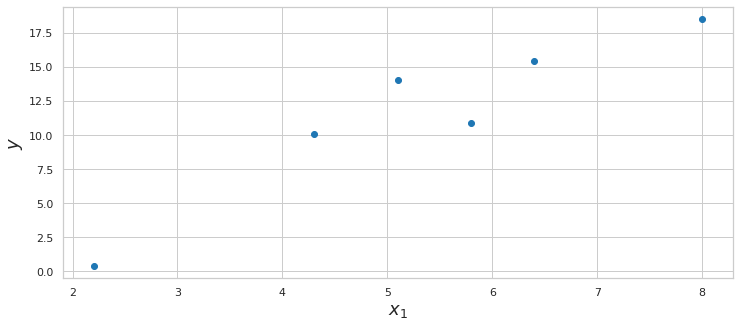

In [3]:
x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
plt.plot(x,y,"o")
plt.xlabel("$x_1 $", fontsize=18)
plt.ylabel("$y $", rotation=90, fontsize=18)
plt.show()

## Ordinary Least Squares

$$\textbf{y} = b_0+b_1 \textbf{x}$$

Ordinary Least Squares (OLS) is the simplest and most common **estimator** in which the two $b$'s are chosen to minimize the sum of squared distance between the predicted values and the actual values. 

Given the set of samples $(\textbf{x},\textbf{y})$, the objective is to minimize:

$$ ||b_0 + b_1 \textbf{x} -  \textbf{y} ||^2_2 = \sum_{j=1}^n (b_0+b_1 x_{j} -  y_j )^2,$$ with respect to $b_0, b_1$.

This expression is often called **sum of squared errors of prediction (SSE)**.

## How to compute the OLS: Scipy.optimize

In [4]:
# To understand the use of zip in the next code:
list(zip([2,3,4,5,6],[40,50,60,70,80]))

[(2, 40), (3, 50), (4, 60), (5, 70), (6, 80)]

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


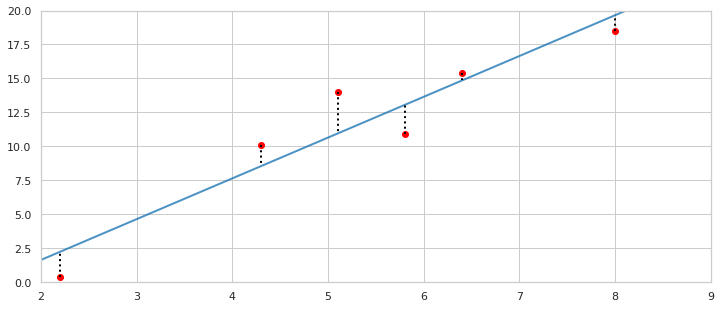

In [5]:
from scipy.optimize import fmin

# Minimize the sum of squares using a lambda function

sse = lambda b, x, y: np.sum((y - b[0] - b[1]*x) ** 2) # Store the sum of squared differences function
# Lambda function is a small anonymous function. 
# It can take any number of arguments, but can only have one expression. 
# Syntax "lambda arguments : expression"

b0,b1 = fmin(sse, [0,1], args=(x,y)); # Minimize the sum of squared differences
# [0,1] is the initial guess for w[0] and w[1] in function sse.

plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10], alpha=0.8) # Add the regression line, colored in blue
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, b0+b1*xi], "k:") # Add pointed black line to illustrate the errors
plt.xlim(2, 9); plt.ylim(0, 20) # Restrict the domain
plt.show()

We can minimize other criteria, such as the **sum of absolute differences between the predicted values and the actual values**. 

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77


(0.0, 20.0)

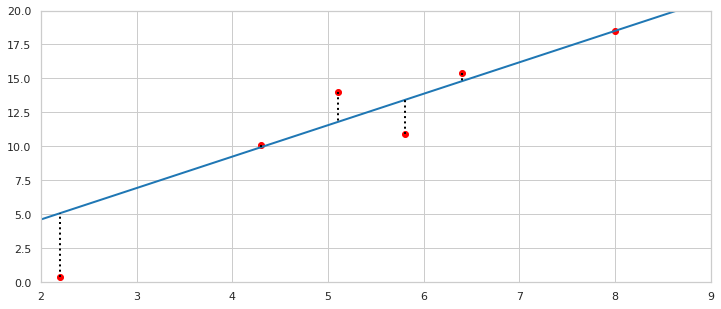

In [6]:
sabs = lambda b, x, y: np.sum(np.abs(y - b[0] - b[1]*x)) # Lambda function 

b0,b1 = fmin(sabs, [0,1], args=(x,y)) # Minimize the sum of absolute differences
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10]) # Add the regression line, colored in blue
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, b0+b1*xi], "k:") # Add pointed black line to illustrate the errors
plt.xlim(2, 9); plt.ylim(0, 20) # Restrict the domain

### Example 1: Adversiting dataset

Let's play with an Adversiting dataset from the book "Introduction to Statistical Learning"

**The Data** 

A data frame with 200 observations on the following 4 variables (TV ,Radio, Newspaper, Sales)

OLS is a popular approach for several reasons. 

+ It is computationally cheap to calculate the coefficients. 
+ It is easier to interpret than more sophisticated models. In situations where the goal is understanding a simple model in detail, rather than estimating the response well, they can provide insight into what the model captures. 
+ Finally, in situations where there is a lot of noise, it may be hard to find the true functional form, so a constrained model can perform quite well compared to a complex model which is more affected by noise.

The resulting model is represented as follows:

$$\widehat{\textbf{y}} = \widehat{b}_0+\widehat{b}_1 \textbf{x}$$

Here the hats on the variables represent the fact that they are estimated from the data we have available.

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv',index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
print(df.shape)

(200, 4)


What are the features?

* TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
* Radio: advertising dollars spent on Radio
* Newspaper: advertising dollars spent on Newspaper

What is the response?

* Sales: sales of a single product in a given market (in thousands of items)

What else do we know?

Because the response variable is continuous, this is a regression problem.
There are 200 observations (represented by the rows), and each observation is a single market

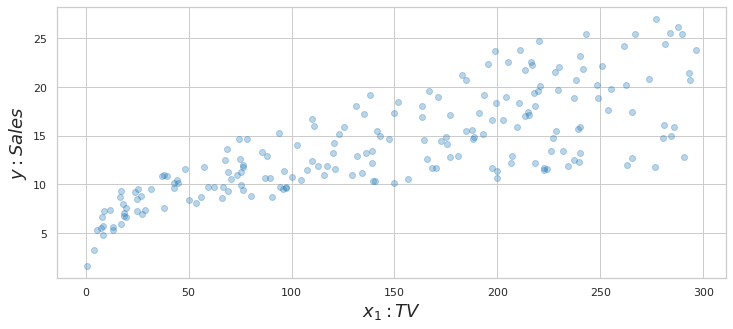

In [9]:
X = df[['TV']]
y = df[['Sales']]
plt.plot(X,y,"o", alpha=0.3)
plt.xlabel("$x_1 : TV$", fontsize=18)
plt.ylabel("$y : Sales$", rotation=90, fontsize=18)
plt.show()

In [10]:
X_b = np.c_[np.ones((200, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[7.03259355],
       [0.04753664]])

In [12]:

X_new = np.array([[0], [300]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 7.03259355],
       [21.29358568]])

The figure in the book actually corresponds to the following code, with a legend and axis labels:

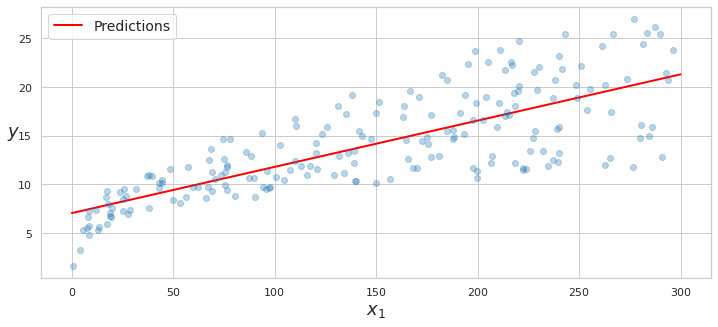

In [13]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "o",alpha=0.3)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([7.03259355]), array([[0.04753664]]))

In [15]:
lin_reg.predict(X_new)

array([[ 7.03259355],
       [21.29358568]])

As you can see, in this case, far values are penalized less.

## Performing Linear Regression using Statsmodel package

In [16]:
import statsmodels.formula.api as smf

import statsmodels.api as sm
from scipy import stats
model = smf.ols(formula='Sales ~ TV', data=df)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           1.47e-42
Time:                        14:37:03   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

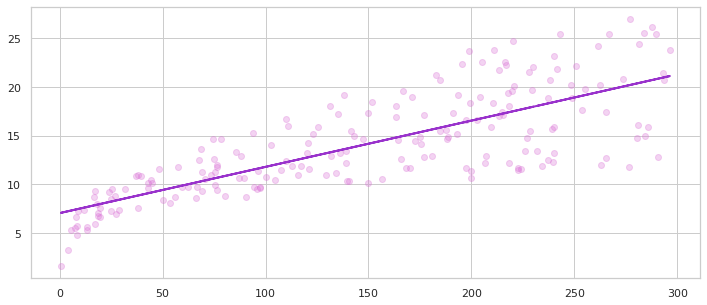

In [17]:

y_pred = model.predict(X)
plt.scatter(X, y, alpha=0.3, color='orchid')
plt.plot(X, y_pred, '-', color='darkorchid', linewidth=2)
plt.show()

## Performing Linear Regression using SciKitLearn package

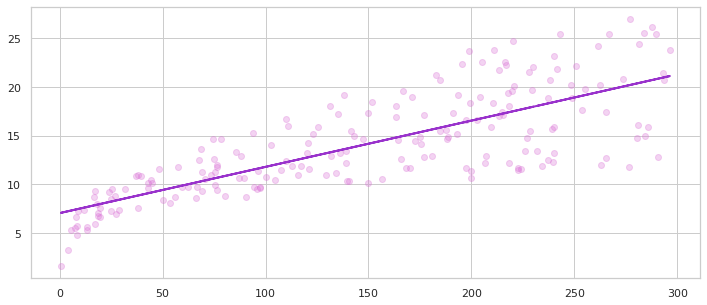

Coefficients: 
 [[0.04753664]]
Mean squared error: 10.513
Coefficient of determination (R^2): 0.612


In [18]:
from sklearn import linear_model

from sklearn.metrics import mean_squared_error, r2_score


lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)

y_pred = lin_reg.predict(X)
# plot the output

# Plot outputs
plt.scatter(X, y, alpha=0.3, color='orchid')
plt.plot(X, y_pred, '-', color='darkorchid', linewidth=2)
plt.show()


# The coefficients
print('Coefficients: \n', lin_reg.coef_)
# The mean squared error
print('Mean squared error: %.3f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R^2): %.3f'
      % r2_score(y, y_pred))

## Multiple Linear Regression
Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

$$ Y = \beta_0 + \beta_1X_1 + ... \beta_pX_p + \epsilon $$

We interpret $\beta_j$ as the average effect on $Y$ of a one unit increase in $X_j$ , holding all other predictors fixed. In the advertising example, the model becomes:

$$ {\color{red}{sales}} = \beta_0 + \beta_1 ~x~ {\color{red}{TV}} + \beta_2 ~x~ {\color{red}{radio}} + \beta_3 ~x~ {\color{red}{newspaper}} + \epsilon $$

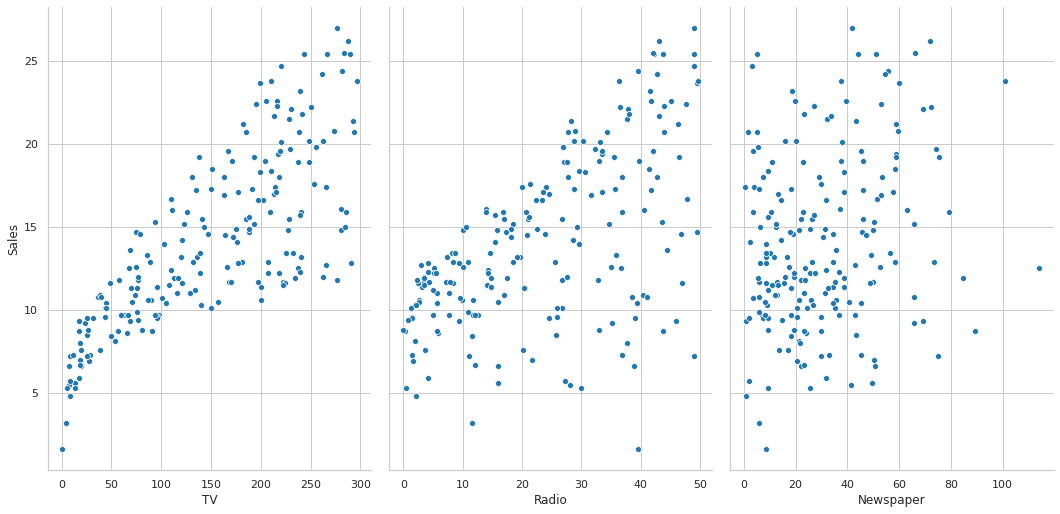

In [19]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'],y_vars='Sales', height=7, aspect=0.7)
plt.show()

In [20]:
## with statsmodel
model = smf.ols(formula='Sales ~ TV + Radio', data=df)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           4.83e-98
Time:                        14:37:06   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

In [21]:
features = ['TV','Radio','Newspaper']
lin_reg = LinearRegression()
lin_reg.fit(df[features], y)

y_pred = lin_reg.predict(df[features])

# The coefficients
print('Coefficients: \n', lin_reg.coef_)
# The mean squared error
print('Mean squared error: %.3f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R^2): %.3f'
      % r2_score(y, y_pred))

Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]
Mean squared error: 2.784
Coefficient of determination (R^2): 0.897


We can see how the Coefficient of determination (R^2) has improved from 0.612 to 0.897

In [22]:
corrMatrix = df.corr()
print (corrMatrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


### Example 2:  Macroeconomic dataset

To start with we load the Longley dataset of US macroeconomic data from the R datasets website.

In [23]:
import pandas as pd
# Read data
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.columns = ['GNPdeflator', 'GNP', 'Unemployed', 'ArmedForces', 'Population','Year', 'Employed']
df.head()

,GNPdeflator,GNP,Unemployed,ArmedForces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [24]:
print(df.shape)

(16, 7)


Macroeconomic data from 1947 to 1962.

We will use the variable Total Derived Employment ('Employed') as our response $\textbf{y}$ and Gross National Product ('GNP') as our predictor $\textbf{x}$.

We also add a constant term so that we fit the intercept of our linear model: $X=(\textbf{1},\textbf{x})$

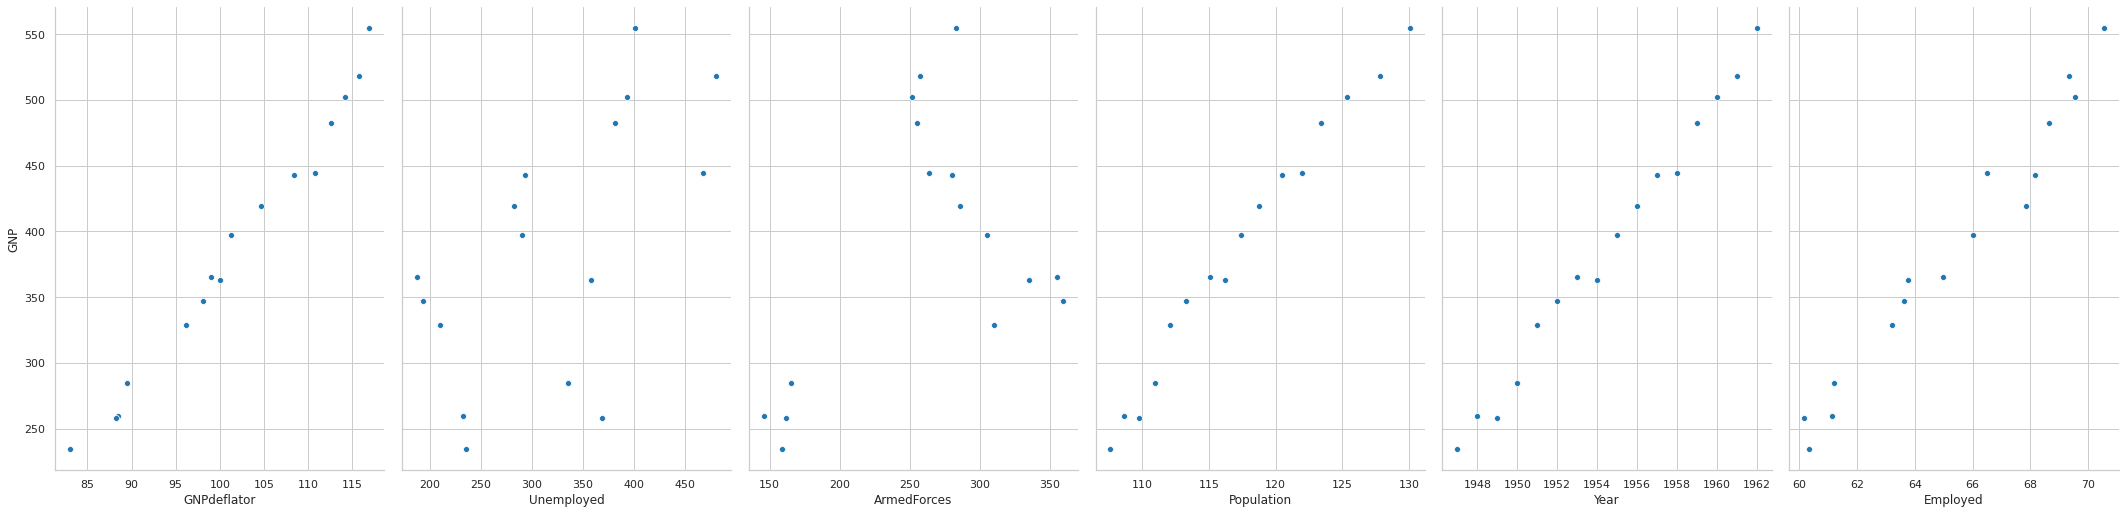

In [25]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['GNPdeflator','Unemployed','ArmedForces','Population','Year','Employed'],y_vars='GNP', height=7, aspect=0.7)
plt.show()

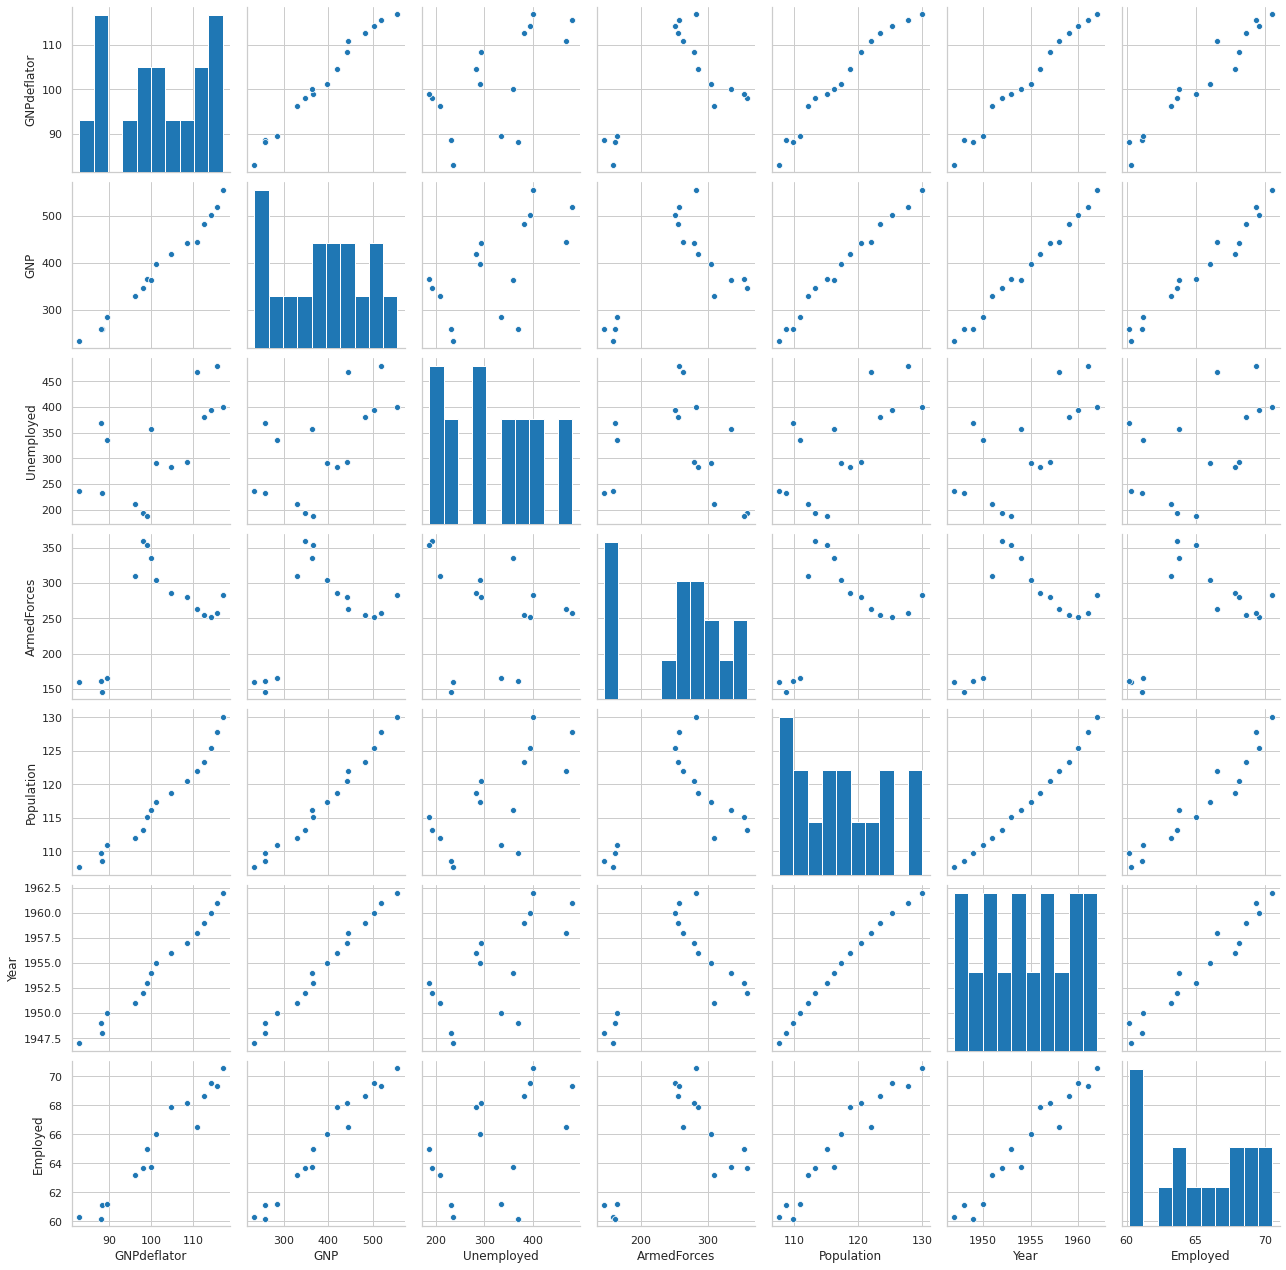

In [26]:
# another interesting graph from seaborn
sns.pairplot(df)
plt.show()

Let's create a model

In [27]:
## with sciklearn
features = ['GNPdeflator','Unemployed','ArmedForces','Population','Year','Employed']
target = ['GNP']

X = df[features]
y = df[target]

lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_pred = lin_reg.predict(X)

# The coefficients
print('Coefficients: \n', lin_reg.coef_)
# The mean squared error
print('Mean squared error: %.3f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R^2): %.3f'
      % r2_score(y, y_pred))

Coefficients: 
 [[ 1.50831401 -0.18594796 -0.05912791  4.82925005 15.43187147 -3.14815228]]
Mean squared error: 4.595
Coefficient of determination (R^2): 1.000


In [28]:
## with statsmodel
model = smf.ols(formula='GNP ~ GNPdeflator + Unemployed + ArmedForces + Population + Year + Employed', data=df)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GNP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3022.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           2.41e-14
Time:                        14:37:27   Log-Likelihood:                -34.902
No. Observations:                  16   AIC:                             83.80
Df Residuals:                       9   BIC:                             89.21
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.021e+04   9309.721     -3.245      

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


We can see signs of non linearity in the data which has not been captured by the model. 

In order to capture this non-linear effects, we have another type of regression known as polynomial regression. See below.

## Regularized Models

### Ridge Regression.
Ridge Regression penalizes the coefficients if they are too far from zero, thus enforcing them to be small in a continuous way. This way, it decreases model complexity while keeping all variables in the model.

For that, Ridge regression adds a **$\ell_2$-norm** regularization term to the sum of squared errors of prediction (SSE). Given the set of samples  (𝑋,𝐲) , the objetive is to minimize:

$$ minimize(\sum_{i=0}^n (y_i - B_0- \sum_{j=1}^pB_jx_{ij})^2 - \lambda\sum_{j=1}^pB_j^2) $$

### Lasso Regression:

Often, in real problems, there are uninformative variables in the data which prevent proper modeling of the problem and thus, the building of a correct regression model. In such cases, a feature selection process is crucial to select only the informative features and discard non-informative ones. This can be achieved by sparse methods which use a penalization approach, such as **Lasso** (least absolute shrinkage and selection operator) to set some model coefficients to zero (thereby discarding those variables). Sparsity can be seen as an application of Occam’s razor: prefer simpler models to complex ones.
For that, Lasso regression adds a **$\ell_1$-norm** regularization term to the sum of squared errors of prediction (SSE).  Given the set of samples  (𝑋,𝐲) , the objetive is to minimize:

$$ minimize(\sum_{i=0}^n (y_i - B_0- \sum_{j=1}^pB_jx_{ij})^2 - \lambda\sum_{j=1}^p|B_j|)$$

#### Geometric explanantion:
The left panel shows L1 regularization (lasso regularization) and the right panel L2 regularization (Ridge regression). The ellipses indicate the distribution for no regularization. The blue lines show the constraints due to regularization (limiting  𝜃2  for ridge regression and  |𝜃|  for Lasso regression). The corners of the L1 regularization create more opportunities for the solution to have zeros for some of the weights.

![alt text](https://miro.medium.com/max/1400/1*Jd03Hyt2bpEv1r7UijLlpg.png "Regularization")




Coeff and intercept: [[ 1.96270524 -0.12953436 -0.02399657  6.21111319  8.95510686  0.32286008]] [-18017.43072961]


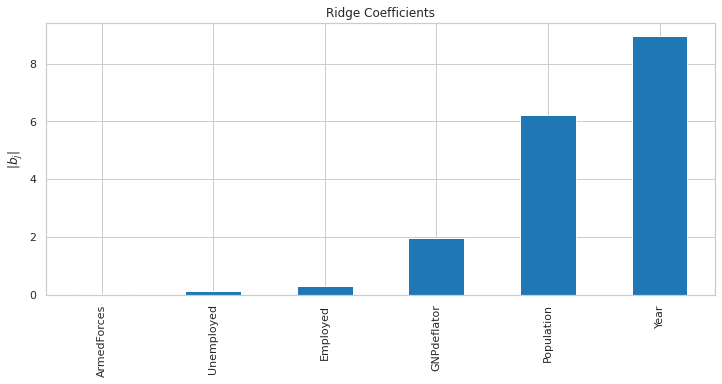

In [29]:
## Ridge Regression
regr_ridge = linear_model.Ridge(alpha=.3) # Create a Ridge regressor
regr_ridge.fit(X, y)  # Perform the fitting

print('Coeff and intercept: {} {}'.format(regr_ridge.coef_,  regr_ridge.intercept_))
coef = pd.Series(np.abs(regr_ridge.coef_[0]),features).sort_values()
coef.plot(kind='bar', title='Ridge Coefficients',ylabel="|$b_j$|")

Coeff and intercept: [ 2.19911646 -0.13035612 -0.02116011  6.90843324  7.62990224  0.        ] [-15512.62771113]


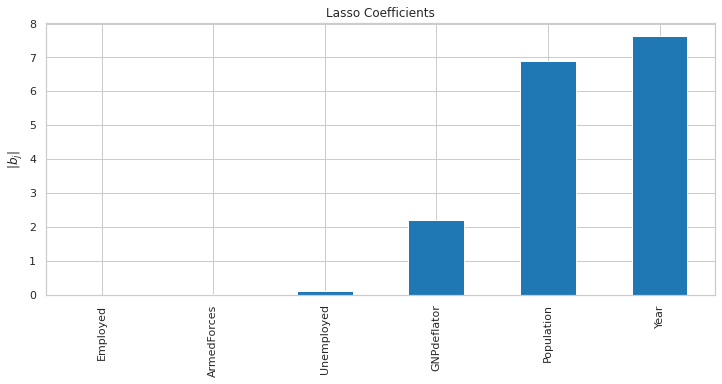

In [30]:
## Lasso Regression
regr_lasso = linear_model.Lasso(alpha=.3,tol=0.001) # Create a Ridge regressor
regr_lasso.fit(X, y)  # Perform the fitting

print('Coeff and intercept: {} {}'.format(regr_lasso.coef_,  regr_lasso.intercept_))

coef = pd.Series(np.abs(regr_lasso.coef_),features).sort_values()
coef.plot(kind='bar', title='Lasso Coefficients',ylabel="|$b_j$|")

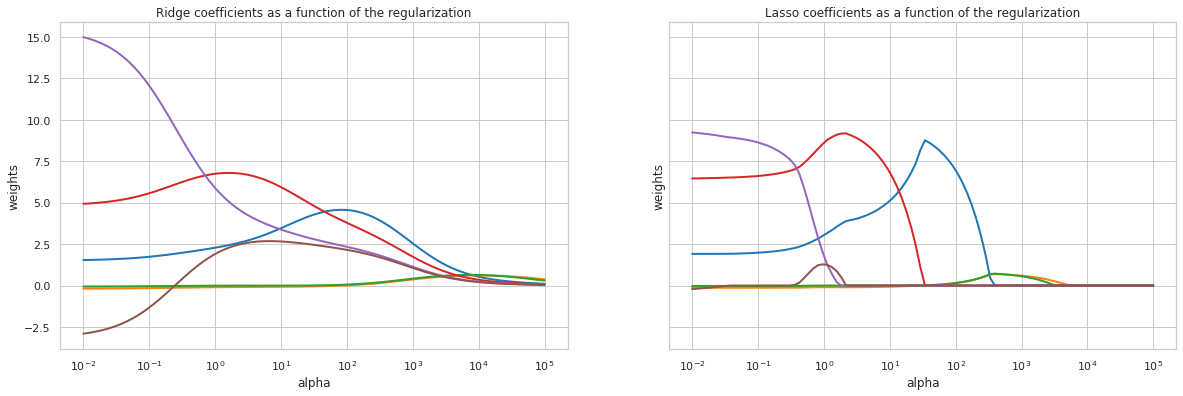

In [31]:
n_alphas = 100
alphas = np.logspace(-2, 5, n_alphas)

coefs_ridge = []

for l in alphas:
    regr_ridge = linear_model.Ridge(alpha=l) # Create a Ridge regressor
    regr_ridge.fit(X, y)  # Perform the fitting
    coefs_ridge.append(regr_ridge.coef_[0])
    
coefs_lasso = []
for l in alphas:
    regr_lasso = linear_model.Lasso(alpha=l,tol =0.001) # Create a Ridge regressor
    regr_lasso.fit(X, y)  # Perform the fitting
    coefs_lasso.append(regr_lasso.coef_)
# #############################################################################
# Display results

fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)


axs[0].plot(alphas, coefs_ridge)
axs[0].set_xscale('log')
axs[0].set_title('Ridge coefficients as a function of the regularization')
axs[0].axis('tight')
axs[0].set_xlabel('alpha')
axs[0].set_ylabel('weights')

axs[1].plot(alphas, coefs_lasso)
axs[1].set_xscale('log')
axs[1].set_title('Lasso coefficients as a function of the regularization')
axs[1].axis('tight')
axs[1].set_xlabel('alpha')
axs[1].set_ylabel('weights')
plt.show()


### EXERCICE: Create and evalualuate a regression model for **THIS** dataset

Remember the ML pipeline: 

#### ML Pipeline
* Setting up the environment and data import
* Understanding the data
* Exploratory Data Analysis
* Linear Regression Model
* Preparation and splitting the data
* Train and Test the Model
* Train and Test New Model
* Compare the models
* Model Performance
* Applying on new data

### STEP 1 - Setting up the enviroment and data import

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/ssegui/ml_ub/master/notebooks/dataset/regression_healthcare/datasets_13720_18513_insurance.csv')
df['charges'] = np.log(df['charges'])
df.shape

(1338, 7)

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


### Step 2 - Understanding the data

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


In [35]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,9.098659
std,14.049960,6.098187,1.205493,0.919527
min,18.000000,15.960000,0.000000,7.022756
25%,27.000000,26.296250,0.000000,8.463853
50%,39.000000,30.400000,1.000000,9.146552
75%,51.000000,34.693750,2.000000,9.719558
max,64.000000,53.130000,5.000000,11.063045


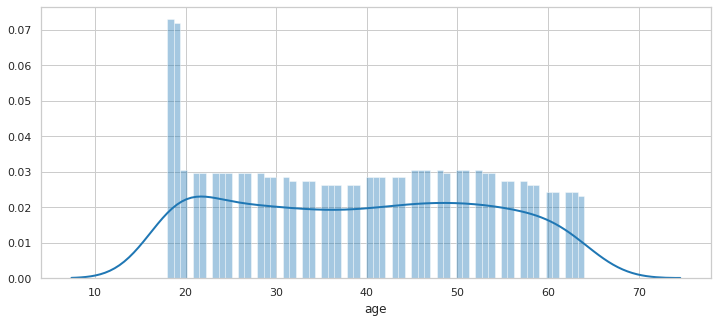

In [36]:
# AGE: Insurance contractor age, year. 
#       min age : 18
#       max age : 64

sns.distplot(df.age,bins=65)
plt.show()

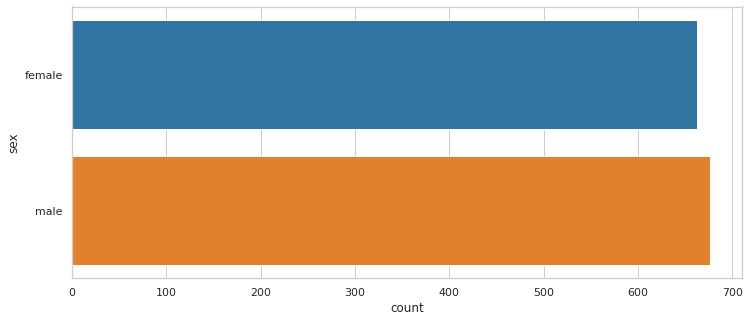

In [37]:
# SEX: Insurance contractor gender, [female, male ]
sns.countplot(data=df, y = 'sex')
plt.show()

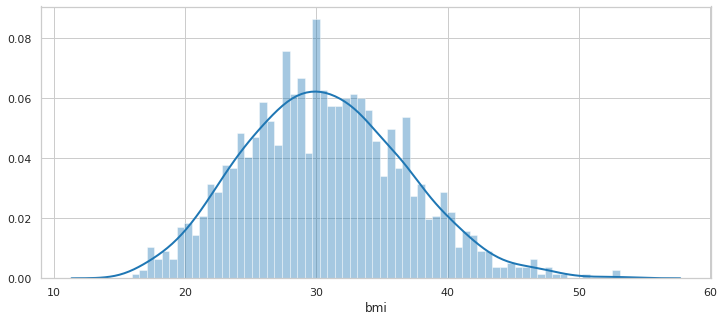

In [38]:
# BMI: Body mass index, providing an understanding of body, weights that are relatively 
# high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of 
# height to weight, ideally 18.5 to 24.9
sns.distplot(df.bmi,bins=65)
plt.show()


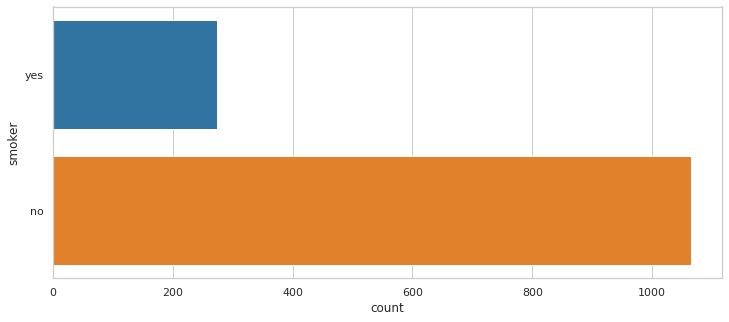

In [39]:
#Smoker: smoking, [yes, no]
sns.countplot(data=df,y='smoker')
plt.show()

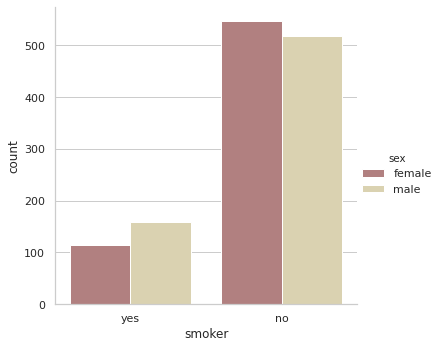

In [40]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)
plt.show()

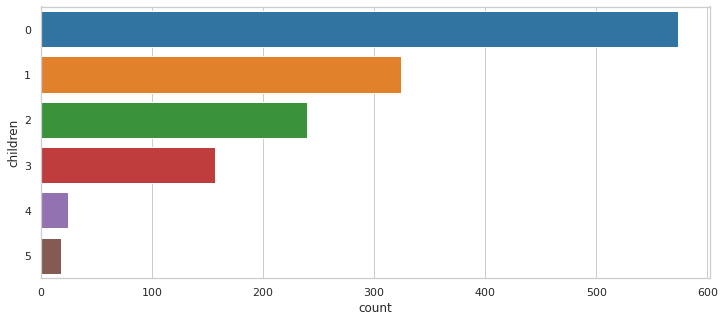

In [41]:
# Children: number of children covered by health insurance / Number of dependents
sns.countplot(data=df,y='children')
plt.show()

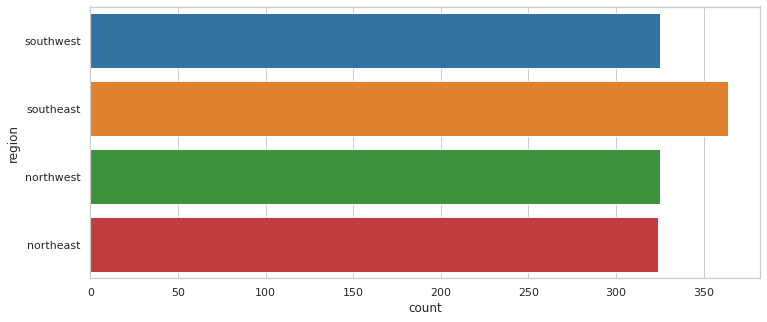

In [42]:
# Children: number of children covered by health insurance / Number of dependents
sns.countplot(data=df,y='region')
plt.show()

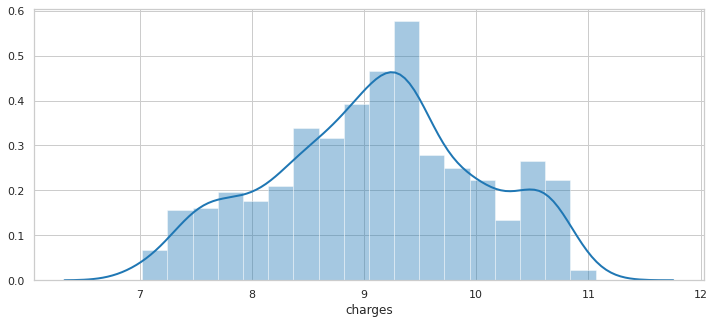

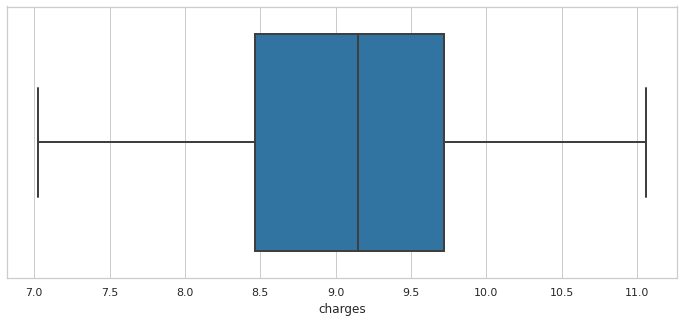

In [43]:
# Charges: Individual medical costs billed by health insurance, $ #predicted value
sns.distplot(df.charges)
plt.show()

sns.boxplot(x=df["charges"])
plt.show()

### Divide data into train and test set

In [44]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.8, random_state=42)

In [45]:
test_set.head()

,age,sex,bmi,children,smoker,region,charges
764,45,female,25.175,2,no,northeast,9.115488
887,36,female,30.020,0,no,northwest,8.570198
890,64,female,26.885,0,yes,northwest,10.286400
1293,46,male,25.745,3,no,northwest,9.137973
259,19,male,31.920,0,yes,northwest,10.426744


## Prepare the data for Machine Learning algorithms


In [46]:
from sklearn.impute import SimpleImputer
cat_attribs = ['sex','region','smoker']
num_attribs = ['bmi','age','children']

X_num = df[num_attribs]
X_cat = df[cat_attribs]

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

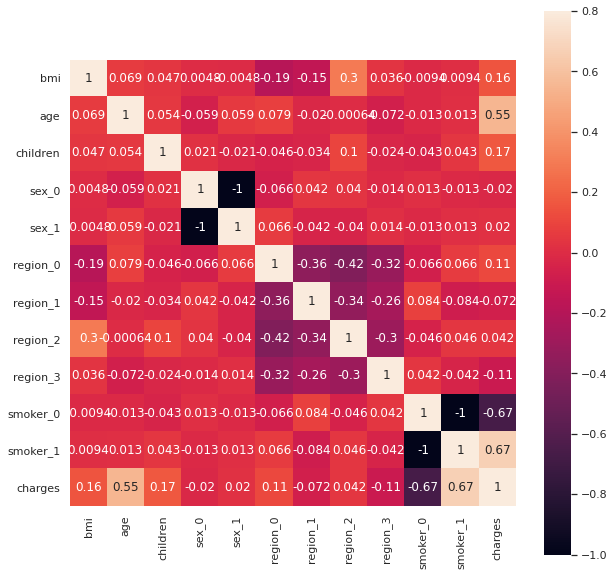

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
X_train = full_pipeline.fit_transform(train_set)
y_train = train_set['charges']
X_train.shape


tmp = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train.values)], axis=1)
tmp.columns = ['bmi','age','children','sex_0','sex_1','region_0','region_1','region_2','region_3','smoker_0','smoker_1','charges']

corrMatrix = tmp.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrMatrix, vmax=.8, square=True, annot=True,ax=ax)
plt.show()

## Select and train a model

In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [50]:
# let's try the full preprocessing pipeline on a few training instances
some_data = train_set.iloc[:5]
some_labels = train_set[['charges']].iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predicted Charges:", lin_reg.predict(some_data_prepared))

Predicted Charges: [9.27188411 9.75026019 9.47592498 9.32540787 8.09107125]


In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(y_train, y_pred)

print(lin_rmse,lin_mae)

0.45068409581858576 0.29877965193996225


### Fine-tune your model


In [52]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [53]:
from sklearn.ensemble import RandomForestRegressor


def cross_val_evaluation(model,X_train,y_train,model_name):
    scores = cross_val_score(model, X_train, y_train,cv=5)
    print("\n ",model_name)
    display_scores(scores)

lin_reg = LinearRegression()
cross_val_evaluation(lin_reg,X_train,y_train,'Linear Regression')

ridge_reg = linear_model.Ridge(alpha=.3) # Create a Ridge regressor
cross_val_evaluation(ridge_reg,X_train,y_train,'Ridge Regression')

lasso_reg = linear_model.Lasso(alpha=0.01) # Create a Ridge regressor
cross_val_evaluation(lasso_reg,X_train,y_train,'Lasso Regression')

forest_reg = RandomForestRegressor(random_state=42)
cross_val_evaluation(forest_reg,X_train,y_train,'Random Forest')


  Linear Regression
Scores: [0.70617812 0.72840205 0.80119627 0.75863311 0.74905469]
Mean: 0.7486928467121675
Standard deviation: 0.03185833515900952

  Ridge Regression
Scores: [0.7060715  0.72983358 0.8008571  0.7580939  0.74948605]
Mean: 0.7488684255881906
Standard deviation: 0.03156648765070146

  Lasso Regression
Scores: [0.69860487 0.74835787 0.79666991 0.76479833 0.74552681]
Mean: 0.75079155852667
Standard deviation: 0.03180598684015645

  Random Forest
Scores: [0.6201485  0.77633364 0.77831868 0.83969963 0.75154909]
Mean: 0.7532099092996385
Standard deviation: 0.07259989701007824


In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'alpha': np.logspace(-2, 5, 100)}]

ridge_reg = linear_model.Ridge() # Create a Ridge regressor
grid_search_ridge = GridSearchCV(ridge_reg, param_grid, cv=5,scoring="neg_mean_squared_error",
                                 return_train_score=True, n_jobs=-1)

grid_search_ridge.fit(X_train, y_train)
print(grid_search_ridge.best_params_)
print(grid_search_ridge.best_score_)
pd.DataFrame(grid_search_ridge.cv_results_)

{'alpha': 2.5353644939701114}
-0.21987650894637317


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043534,0.021523,0.000932,0.000098,0.01,{'alpha': 0.01},-0.247863,-0.237580,-0.167002,-0.237040,-0.212914,-0.220480,0.029098,39,-0.194534,-0.197228,-0.213279,-0.198473,-0.202602,-0.201223,0.006565
1,0.001361,0.000035,0.000710,0.000038,0.0117681,{'alpha': 0.011768119524349984},-0.247863,-0.237572,-0.167004,-0.237043,-0.212912,-0.220479,0.029097,38,-0.194534,-0.197228,-0.213279,-0.198473,-0.202602,-0.201223,0.006565
2,0.001286,0.000045,0.000688,0.000059,0.0138489,{'alpha': 0.013848863713938732},-0.247864,-0.237564,-0.167006,-0.237046,-0.212909,-0.220478,0.029096,37,-0.194534,-0.197228,-0.213279,-0.198473,-0.202602,-0.201223,0.006565
3,0.001202,0.000020,0.000774,0.000247,0.0162975,{'alpha': 0.016297508346206444},-0.247864,-0.237553,-0.167008,-0.237051,-0.212906,-0.220476,0.029095,36,-0.194534,-0.197228,-0.213279,-0.198473,-0.202602,-0.201223,0.006565
4,0.001632,0.000067,0.000897,0.000331,0.0191791,{'alpha': 0.019179102616724886},-0.247865,-0.237541,-0.167011,-0.237056,-0.212902,-0.220475,0.029094,35,-0.194534,-0.197228,-0.213279,-0.198473,-0.202602,-0.201223,0.006565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001335,0.000168,0.000654,0.000102,52140.1,{'alpha': 52140.082879996844},-0.870463,-0.887295,-0.848937,-0.992205,-0.850330,-0.889846,0.053094,96,-0.888796,-0.884110,-0.893265,-0.858080,-0.892646,-0.883379,0.013065
96,0.001373,0.000247,0.000689,0.000087,61359.1,{'alpha': 61359.07273413163},-0.870915,-0.887863,-0.849461,-0.992788,-0.850876,-0.890381,0.053118,97,-0.889395,-0.884638,-0.893825,-0.858594,-0.893191,-0.883928,0.013084
97,0.001370,0.000231,0.000698,0.000159,72208.1,{'alpha': 72208.09018385457},-0.871300,-0.888346,-0.849908,-0.993284,-0.851341,-0.890836,0.053138,98,-0.889905,-0.885086,-0.894301,-0.859031,-0.893654,-0.884396,0.013100
98,0.001357,0.000236,0.000692,0.000079,84975.3,{'alpha': 84975.34359086439},-0.871627,-0.888757,-0.850287,-0.993706,-0.851737,-0.891223,0.053156,99,-0.890339,-0.885468,-0.894707,-0.859403,-0.894048,-0.884793,0.013114


In [55]:
lasso_reg = linear_model.Lasso(tol=0.01) # Create a Ridge regressor
grid_search_lasso = GridSearchCV(lasso_reg, param_grid, cv=5,scoring="neg_root_mean_squared_error",
                                 return_train_score=True,n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)
print(grid_search_lasso.best_params_)
print(grid_search_lasso.best_score_)

pd.DataFrame(grid_search_lasso.cv_results_)

{'alpha': 0.013848863713938732}
-0.4662514797985716


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001686,0.000239,0.000806,0.000081,0.01,{'alpha': 0.01},-0.503720,-0.469500,-0.413263,-0.480598,-0.464690,-0.466354,0.029767,3,-0.443200,-0.447986,-0.464885,-0.449241,-0.452043,-0.451471,0.007291
1,0.001426,0.000296,0.000717,0.000095,0.0117681,{'alpha': 0.011768119524349984},-0.504867,-0.467038,-0.414319,-0.480200,-0.465163,-0.466317,0.029612,2,-0.443957,-0.449251,-0.465578,-0.450675,-0.452629,-0.452418,0.007182
2,0.001448,0.000303,0.000670,0.000096,0.0138489,{'alpha': 0.013848863713938732},-0.505453,-0.464233,-0.415717,-0.480000,-0.465853,-0.466251,0.029270,1,-0.444880,-0.450445,-0.466531,-0.452654,-0.453438,-0.453590,0.007129
3,0.001582,0.000294,0.000764,0.000134,0.0162975,{'alpha': 0.016297508346206444},-0.506180,-0.461504,-0.417519,-0.481207,-0.466844,-0.466651,0.029034,4,-0.446133,-0.451588,-0.467713,-0.454487,-0.454563,-0.454897,0.007103
4,0.001332,0.000203,0.000725,0.000084,0.0191791,{'alpha': 0.019179102616724886},-0.507048,-0.458822,-0.419808,-0.482949,-0.466970,-0.467119,0.028817,5,-0.447388,-0.453236,-0.469163,-0.456689,-0.455692,-0.456434,0.007137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001245,0.000313,0.000672,0.000123,52140.1,{'alpha': 52140.082879996844},-0.934606,-0.943976,-0.923279,-0.998049,-0.924112,-0.944804,0.027681,26,-0.944883,-0.942145,-0.947106,-0.928177,-0.946724,-0.941807,0.007037
96,0.001648,0.000347,0.000746,0.000092,61359.1,{'alpha': 61359.07273413163},-0.934606,-0.943976,-0.923279,-0.998049,-0.924112,-0.944804,0.027681,26,-0.944883,-0.942145,-0.947106,-0.928177,-0.946724,-0.941807,0.007037
97,0.001482,0.000085,0.000776,0.000060,72208.1,{'alpha': 72208.09018385457},-0.934606,-0.943976,-0.923279,-0.998049,-0.924112,-0.944804,0.027681,26,-0.944883,-0.942145,-0.947106,-0.928177,-0.946724,-0.941807,0.007037
98,0.001388,0.000247,0.000743,0.000036,84975.3,{'alpha': 84975.34359086439},-0.934606,-0.943976,-0.923279,-0.998049,-0.924112,-0.944804,0.027681,26,-0.944883,-0.942145,-0.947106,-0.928177,-0.946724,-0.941807,0.007037


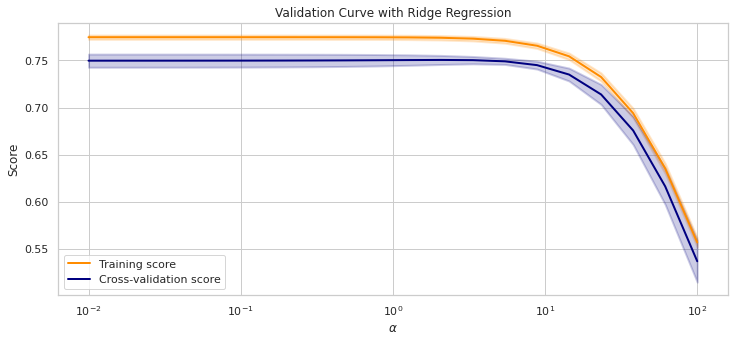

In [56]:
from sklearn.model_selection import validation_curve
param_range= np.logspace(-2, 2, 20)

train_scores, valid_scores = validation_curve(ridge_reg, X_train, y_train, param_name= "alpha",
                                              param_range= param_range,
                                              cv=3)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)


plt.title("Validation Curve with Ridge Regression")
plt.xlabel(r"$\alpha$")
plt.ylabel("Score")

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

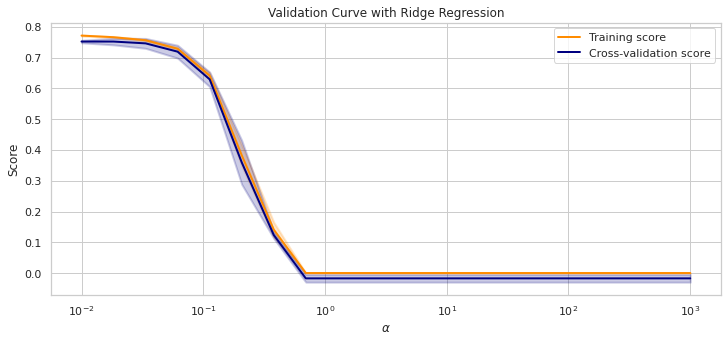

In [57]:
# The same with lasso model
param_range= np.logspace(-2, 3, 20)

train_scores, valid_scores = validation_curve(lasso_reg, X_train, y_train, param_name= "alpha",
                                              param_range= param_range,
                                              cv=3)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)


plt.title("Validation Curve with Ridge Regression")
plt.xlabel(r"$\alpha$")
plt.ylabel("Score")

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### Evaluate test set

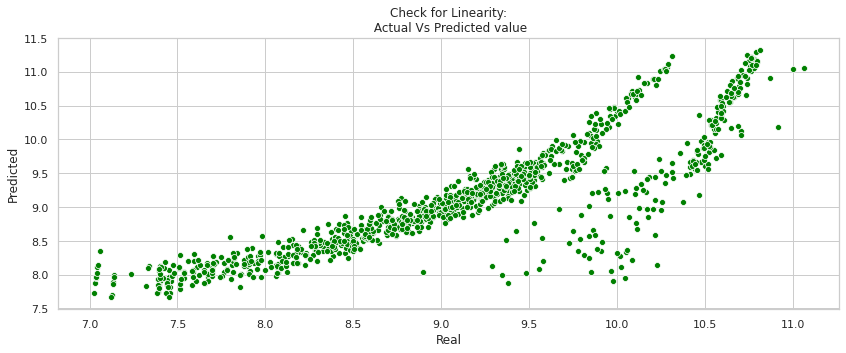

In [58]:
# Check for Linearity
X_test = full_pipeline.transform(test_set)
y_test = test_set['charges']

lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

plt.figure(figsize=(14,5))
sns.scatterplot(y_test,y_pred,color='g')
plt.title('Check for Linearity:\n Actual Vs Predicted value')
plt.ylabel('Predicted')
plt.xlabel('Real')

plt.show()

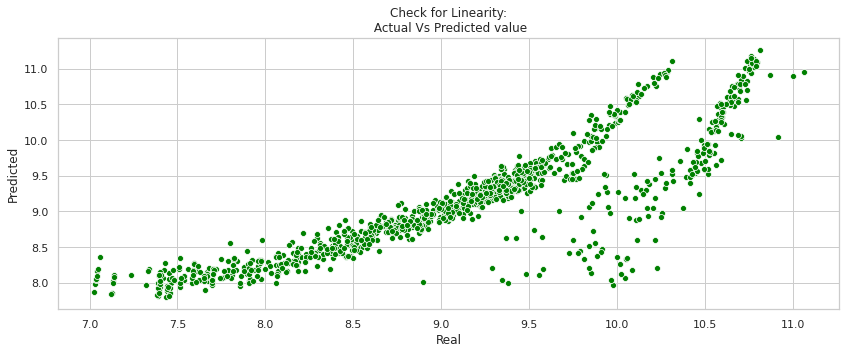

In [59]:
# Check for Linearity --  LASSSO
X_test = full_pipeline.transform(test_set)
y_test = test_set['charges']

grid_search_lasso.fit(X_train,y_train)
y_pred = grid_search_lasso.predict(X_test)

plt.figure(figsize=(14,5))
sns.scatterplot(y_test,y_pred,color='g')
plt.title('Check for Linearity:\n Actual Vs Predicted value')
plt.ylabel('Predicted')
plt.xlabel('Real')

plt.show()

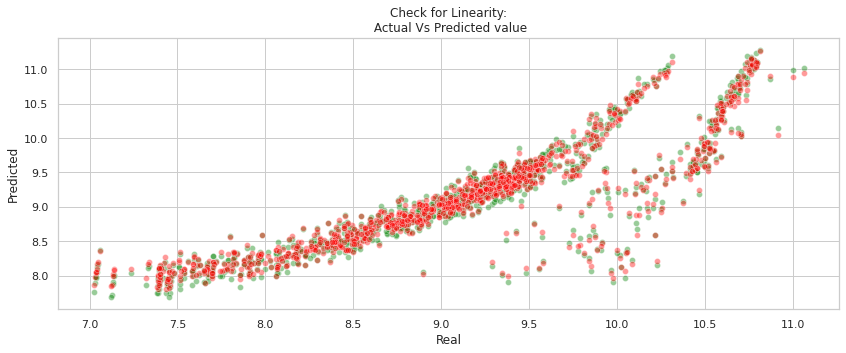

In [60]:
# Check for Linearity --  RIGE
X_test = full_pipeline.transform(test_set)
y_test = test_set['charges']

grid_search_lasso.fit(X_train,y_train)
y_pred_lasso = grid_search_lasso.predict(X_test)

grid_search_ridge.fit(X_train,y_train)
y_pred_ridge = grid_search_ridge.predict(X_test)


plt.figure(figsize=(14,5))
sns.scatterplot(y_test,y_pred_ridge,color='g',alpha=0.4)
sns.scatterplot(y_test,y_pred_lasso,color='r',alpha=0.4)

plt.title('Check for Linearity:\n Actual Vs Predicted value')
plt.ylabel('Predicted')
plt.xlabel('Real')

plt.show()

In [61]:
print("LINEAR REGRESSION")
y_pred = lin_reg.predict(X_test)
# The mean squared error
print(' Mean squared error: %.3f'%  np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print(' Coefficient of determination (R^2): %.3f'% r2_score(y_test, y_pred))

print("\nRIDGE REGRESSION")
print(grid_search_ridge.best_params_)
y_pred = grid_search_ridge.predict(X_test)
# The mean squared error
print(' Mean squared error: %.3f'%  np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print(' Coefficient of determination (R^2): %.3f'% r2_score(y_test, y_pred))

print("\nLASSO REGRESSION")
print(grid_search_lasso.best_params_)
y_pred = grid_search_lasso.predict(X_test)
# The mean squared error
print(' Mean squared error: %.3f'%  np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print(' Coefficient of determination (R^2): %.3f'% r2_score(y_test, y_pred))

LINEAR REGRESSION
 Mean squared error: 0.445
 Coefficient of determination (R^2): 0.762

RIDGE REGRESSION
{'alpha': 2.5353644939701114}
 Mean squared error: 0.446
 Coefficient of determination (R^2): 0.762

LASSO REGRESSION
{'alpha': 0.013848863713938732}
 Mean squared error: 0.448
 Coefficient of determination (R^2): 0.759


### EXERCICE: Create and evalualuate a regression model for **THIS** dataset

Remember the ML pipeline: 

#### ML Pipeline
* Setting up the environment and data import
* Understanding the data
* Exploratory Data Analysis
* Linear Regression Model
* Preparation and splitting the data
* Train and Test the Model
* Train and Test New Model
* Compare the models
* Model Performance
* Applying on new data

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
housing = pd.read_csv('../input/mlub-housing-house-prediction-linearregression/train_set.csv',index_col=0)
#housing['charges'] = np.log(housing['Price'])
housing.shape

(5432, 21)

In [63]:
housing.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0
5,Coburg,4/34 Gladstone St,2,u,650000.0,S,Barry,29/04/2017,7.8,3058.0,2.0,1.0,1.0,136.0,81.0,1975.0,Moreland,-37.74490,144.97540,Northern Metropolitan,11204.0
6,Glen Iris,27 Pascoe St,3,h,1510000.0,PI,hockingstuart,10/09/2016,9.2,3146.0,3.0,2.0,2.0,370.0,NaN,NaN,Boroondara,-37.85970,145.08830,Southern Metropolitan,10412.0
7,Pascoe Vale,5/10 Dorset Rd,3,u,600000.0,S,Nelson,4/03/2017,9.9,3044.0,3.0,1.0,1.0,204.0,124.0,2008.0,Moreland,-37.72340,144.94970,Northern Metropolitan,7485.0
8,Preston,23 Dean St,4,h,1260000.0,SP,Nelson,14/05/2016,8.8,3072.0,4.0,3.0,2.0,654.0,150.0,1950.0,Darebin,-37.73650,145.01730,Northern Metropolitan,14577.0


In [64]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 0 to 5431
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5432 non-null   object 
 1   Address        5432 non-null   object 
 2   Rooms          5432 non-null   int64  
 3   Type           5432 non-null   object 
 4   Price          5432 non-null   float64
 5   Method         5432 non-null   object 
 6   SellerG        5432 non-null   object 
 7   Date           5432 non-null   object 
 8   Distance       5432 non-null   float64
 9   Postcode       5432 non-null   float64
 10  Bedroom2       5432 non-null   float64
 11  Bathroom       5432 non-null   float64
 12  Car            5407 non-null   float64
 13  Landsize       5432 non-null   float64
 14  BuildingArea   2890 non-null   float64
 15  YearBuilt      3302 non-null   float64
 16  CouncilArea    4879 non-null   object 
 17  Lattitude      5432 non-null   float64
 18  Longtitu

In [65]:
housing.loc[housing.Bathroom.isnull(), 'Bathroom']  = housing.groupby('Rooms')['Bathroom'].transform(lambda x: x.fillna(x.mean()))
housing.loc[housing.Car.isnull(), 'Car']  = housing.groupby('Type')['Car'].transform(lambda x: x.fillna(x.mean()))
housing.loc[housing.Landsize.isnull(), 'Landsize']  = housing.groupby('Type')['Landsize'].transform(lambda x: x.fillna(x.mean()))
housing = housing.dropna()

In [66]:
housing_num = housing.select_dtypes(include=[np.number])
numerical_features = list(housing_num)
categorical_features = list(housing.select_dtypes(include=[object]))
print(categorical_features)

['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


In [67]:
housing.groupby('Regionname', as_index=False).agg({"Car": "mean","Price": "mean","Rooms": "mean"})

,Regionname,Car,Price,Rooms
0,Eastern Metropolitan,1.883408,1.124557e+06,3.336323
1,Eastern Victoria,2.181818,6.842256e+05,3.636364
2,Northern Metropolitan,1.410053,8.697805e+05,2.689153
3,Northern Victoria,2.000000,5.704500e+05,3.500000
4,South-Eastern Metropolitan,2.139241,9.378215e+05,3.506329
5,Southern Metropolitan,1.565574,1.372790e+06,2.898126
6,Western Metropolitan,1.714542,8.635822e+05,3.062837
7,Western Victoria,1.500000,3.911667e+05,3.500000


In [68]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.7951,145.0696,Southern Metropolitan,7809.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.7680,145.1027,Eastern Metropolitan,5420.0
5,Coburg,4/34 Gladstone St,2,u,650000.0,S,Barry,29/04/2017,7.8,3058.0,2.0,1.0,1.0,136.0,81.0,1975.0,Moreland,-37.7449,144.9754,Northern Metropolitan,11204.0
7,Pascoe Vale,5/10 Dorset Rd,3,u,600000.0,S,Nelson,4/03/2017,9.9,3044.0,3.0,1.0,1.0,204.0,124.0,2008.0,Moreland,-37.7234,144.9497,Northern Metropolitan,7485.0
8,Preston,23 Dean St,4,h,1260000.0,SP,Nelson,14/05/2016,8.8,3072.0,4.0,3.0,2.0,654.0,150.0,1950.0,Darebin,-37.7365,145.0173,Northern Metropolitan,14577.0


In [69]:
housing = housing.drop(['Address','SellerG','Date','Suburb','Postcode'],axis=1)
housing = pd.get_dummies(housing,columns= ['Type','Method','CouncilArea','Regionname'],drop_first=True)

In [70]:
housing = housing.fillna(housing.mean())

In [71]:
X_train = housing.drop("Price", axis=1) # drop labels for training set
y_train = housing["Price"].copy()

In [72]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X_train.values)
X = pd.DataFrame(X)
X.columns = X_train.columns.tolist()
X_train = X

In [73]:
X_train

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Cardinia,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,CouncilArea_Kingston,CouncilArea_Knox,CouncilArea_Macedon Ranges,CouncilArea_Manningham,CouncilArea_Maribyrnong,CouncilArea_Maroondah,CouncilArea_Melbourne,CouncilArea_Melton,CouncilArea_Monash,CouncilArea_Moonee Valley,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0.064536,-0.111274,0.090137,-0.802189,2.511878,0.101781,-0.261419,-0.395049,0.169755,0.774993,0.090364,-0.335111,-0.559458,-1.330509,-0.087582,-0.408534,-0.309351,-0.18079,3.031131,-0.179605,-0.02002,-0.063423,-0.277111,-0.072357,-0.261712,-0.063423,-0.19452,-0.122665,-0.142974,-0.077756,-0.028318,-0.155596,-0.258199,-0.077756,-0.201081,-0.087582,-0.172345,-0.293533,-0.344646,-0.053032,-0.228641,-0.233451,-0.163517,-0.120972,-0.098533,-0.249254,-0.040064,-0.066532,-0.659153,-0.063423,-0.18079,1.386621,-0.535968,-0.049088
1,1.090530,0.684987,1.103573,1.986479,0.416408,0.212715,0.212767,0.151265,0.525381,1.100553,-0.461110,-0.335111,-0.559458,-1.330509,-0.087582,-0.408534,3.232575,-0.18079,-0.329910,-0.179605,-0.02002,-0.063423,-0.277111,-0.072357,-0.261712,-0.063423,-0.19452,-0.122665,-0.142974,-0.077756,-0.028318,6.426903,-0.258199,-0.077756,-0.201081,-0.087582,-0.172345,-0.293533,-0.344646,-0.053032,-0.228641,-0.233451,-0.163517,-0.120972,-0.098533,-0.249254,-0.040064,-0.066532,-0.659153,-0.063423,-0.18079,-0.721178,-0.535968,-0.049088
2,-0.961459,-0.353614,-0.923299,-0.802189,-0.631328,-0.321213,-0.607180,0.287844,0.828516,-0.151527,0.874061,-0.335111,1.787445,0.751592,-0.087582,-0.408534,-0.309351,-0.18079,-0.329910,-0.179605,-0.02002,-0.063423,-0.277111,-0.072357,-0.261712,-0.063423,-0.19452,-0.122665,-0.142974,-0.077756,-0.028318,-0.155596,-0.258199,-0.077756,-0.201081,-0.087582,-0.172345,-0.293533,2.901529,-0.053032,-0.228641,-0.233451,-0.163517,-0.120972,-0.098533,-0.249254,-0.040064,-0.066532,1.517098,-0.063423,-0.18079,-0.721178,-0.535968,-0.049088
3,0.064536,0.009896,0.090137,-0.802189,-0.631328,-0.259884,-0.182388,1.189263,1.110654,-0.404303,0.015572,-0.335111,1.787445,0.751592,-0.087582,-0.408534,-0.309351,-0.18079,-0.329910,-0.179605,-0.02002,-0.063423,-0.277111,-0.072357,-0.261712,-0.063423,-0.19452,-0.122665,-0.142974,-0.077756,-0.028318,-0.155596,-0.258199,-0.077756,-0.201081,-0.087582,-0.172345,-0.293533,2.901529,-0.053032,-0.228641,-0.233451,-0.163517,-0.120972,-0.098533,-0.249254,-0.040064,-0.066532,1.517098,-0.063423,-0.18079,-0.721178,-0.535968,-0.049088
4,1.090530,-0.180514,1.103573,1.986479,0.416408,0.145974,0.074463,-0.395049,0.938747,0.260587,1.652680,-0.335111,-0.559458,-1.330509,-0.087582,2.447774,-0.309351,-0.18079,-0.329910,-0.179605,-0.02002,-0.063423,3.608666,-0.072357,-0.261712,-0.063423,-0.19452,-0.122665,-0.142974,-0.077756,-0.028318,-0.155596,-0.258199,-0.077756,-0.201081,-0.087582,-0.172345,-0.293533,-0.344646,-0.053032,-0.228641,-0.233451,-0.163517,-0.120972,-0.098533,-0.249254,-0.040064,-0.066532,1.517098,-0.063423,-0.18079,-0.721178,-0.535968,-0.049088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,0.064536,0.113757,0.090137,-0.802189,-0.631328,0.080135,-0.360208,-0.121892,0.510946,-1.311152,-0

# Ridge & Lasso

In [74]:
## Ridge Regression
regr_ridge = linear_model.Ridge(alpha=.3) # Create a Ridge regressor
regr_ridge.fit(X_train, y_train)  # Perform the fitting

Ridge(alpha=0.3)

In [75]:
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [76]:
print ("Ridge model:", pretty_print_coefs(regr_ridge.coef_))

Ridge model: 172117.425 * X0 + -149612.483 * X1 + -22296.746 * X2 + 137669.521 * X3 + 43258.757 * X4 + 13016.034 * X5 + 90222.728 * X6 + -106747.69 * X7 + -133205.509 * X8 + -918.769 * X9 + -7100.471 * X10 + -58388.617 * X11 + -159697.674 * X12 + 34026.596 * X13 + 3251.951 * X14 + 12531.864 * X15 + 24319.135 * X16 + 74948.788 * X17 + 175791.659 * X18 + -30015.274 * X19 + -10599.76 * X20 + -15505.409 * X21 + 46134.976 * X22 + -16704.695 * X23 + 34509.551 * X24 + -8976.568 * X25 + -20096.962 * X26 + 9675.036 * X27 + -4198.071 * X28 + -17552.356 * X29 + 15192.754 * X30 + 5068.266 * X31 + -22617.833 * X32 + -2187.673 * X33 + 41646.613 * X34 + -27819.131 * X35 + 18635.171 * X36 + 23012.249 * X37 + 17265.231 * X38 + -11419.372 * X39 + 61032.313 * X40 + 109122.867 * X41 + 29207.997 * X42 + 16697.355 * X43 + -48995.644 * X44 + 41674.708 * X45 + 7589.436 * X46 + -16890.835 * X47 + -92974.937 * X48 + 18103.883 * X49 + -48168.208 * X50 + -97524.862 * X51 + -69183.951 * X52 + 8591.172 * X53


In [77]:
## Lasso Regression
regr_lasso = linear_model.Lasso(alpha=.3,tol=0.001) # Create a Ridge regressor
regr_lasso.fit(X_train, y_train)  # Perform the fitting


Lasso(alpha=0.3, tol=0.001)

In [78]:
print ("Lasso model:", pretty_print_coefs(regr_lasso.coef_))

Lasso model: 172320.004 * X0 + -149672.822 * X1 + -22506.219 * X2 + 137697.643 * X3 + 43250.932 * X4 + 13016.526 * X5 + 90213.243 * X6 + -106724.878 * X7 + -133159.758 * X8 + -934.697 * X9 + -7131.261 * X10 + -58414.437 * X11 + -159739.437 * X12 + 34051.478 * X13 + 3259.396 * X14 + 12543.74 * X15 + 24331.006 * X16 + 75294.254 * X17 + 176350.628 * X18 + -29758.072 * X19 + -10559.128 * X20 + -15390.486 * X21 + 46509.044 * X22 + -16566.885 * X23 + 34978.705 * X24 + -8864.92 * X25 + -19815.205 * X26 + 9845.664 * X27 + -3948.5 * X28 + -17499.522 * X29 + 15224.913 * X30 + 5093.817 * X31 + -22262.117 * X32 + -2166.351 * X33 + 41935.641 * X34 + -27708.297 * X35 + 18909.902 * X36 + 23409.256 * X37 + 17687.2 * X38 + -11399.945 * X39 + 61435.879 * X40 + 109542.63 * X41 + 29354.094 * X42 + 16863.024 * X43 + -48842.897 * X44 + 41997.508 * X45 + 7650.617 * X46 + -16974.088 * X47 + -93558.461 * X48 + 18048.886 * X49 + -48407.057 * X50 + -98316.164 * X51 + -69765.429 * X52 + 8537.708 * X53


In [79]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeCV

# load data
X = X_train
y = y_train

# Use L2 penalty
estimator = RidgeCV(cv=5, normalize = True)

# Set a minimum threshold of 0.25
sfm = SelectFromModel(estimator, threshold=0.25, prefit=False, norm_order=2, max_features=12)

sfm.fit(X, y)

feature_idx = sfm.get_support()
feature_name = X.columns[feature_idx]
feature_name

# n_features = sfm.transform(X).shape[1]
# n_features

Index(['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea',
       'YearBuilt', 'Lattitude', 'Longtitude', 'Type_u',
       'CouncilArea_Boroondara', 'Regionname_Southern Metropolitan'],
      dtype='object')

In [80]:
print ("Ridge model:", pretty_print_coefs(regr_lasso.coef_))

Ridge model: 172320.004 * X0 + -149672.822 * X1 + -22506.219 * X2 + 137697.643 * X3 + 43250.932 * X4 + 13016.526 * X5 + 90213.243 * X6 + -106724.878 * X7 + -133159.758 * X8 + -934.697 * X9 + -7131.261 * X10 + -58414.437 * X11 + -159739.437 * X12 + 34051.478 * X13 + 3259.396 * X14 + 12543.74 * X15 + 24331.006 * X16 + 75294.254 * X17 + 176350.628 * X18 + -29758.072 * X19 + -10559.128 * X20 + -15390.486 * X21 + 46509.044 * X22 + -16566.885 * X23 + 34978.705 * X24 + -8864.92 * X25 + -19815.205 * X26 + 9845.664 * X27 + -3948.5 * X28 + -17499.522 * X29 + 15224.913 * X30 + 5093.817 * X31 + -22262.117 * X32 + -2166.351 * X33 + 41935.641 * X34 + -27708.297 * X35 + 18909.902 * X36 + 23409.256 * X37 + 17687.2 * X38 + -11399.945 * X39 + 61435.879 * X40 + 109542.63 * X41 + 29354.094 * X42 + 16863.024 * X43 + -48842.897 * X44 + 41997.508 * X45 + 7650.617 * X46 + -16974.088 * X47 + -93558.461 * X48 + 18048.886 * X49 + -48407.057 * X50 + -98316.164 * X51 + -69765.429 * X52 + 8537.708 * X53


In [81]:
ridge_features = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea',
       'YearBuilt', 'Lattitude', 'Longtitude', 'Type_u',
       'CouncilArea_Boroondara', 'Regionname_Southern Metropolitan']

In [82]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# load data
X = X_train
y = y_train

# Use L1 penalty
estimator = LassoCV(cv=5, normalize = True)

# Set a minimum threshold of 0.25
sfm = SelectFromModel(estimator, threshold=0.25, prefit=False, norm_order=1, max_features=12)

sfm.fit(X, y)

feature_idx = sfm.get_support()
feature_name = X.columns[feature_idx]
feature_name

# n_features = sfm.transform(X).shape[1]
# n_features

Index(['Rooms', 'Distance', 'Bathroom', 'BuildingArea', 'YearBuilt',
       'Lattitude', 'Type_t', 'Type_u', 'CouncilArea_Bayside',
       'CouncilArea_Boroondara', 'CouncilArea_Stonnington',
       'CouncilArea_Wyndham'],
      dtype='object')

In [83]:
lasso_features = ['Rooms', 'Distance', 'Bathroom', 'BuildingArea', 'YearBuilt',
       'Lattitude', 'Type_t', 'Type_u', 'CouncilArea_Bayside',
       'CouncilArea_Boroondara', 'CouncilArea_Stonnington',
       'CouncilArea_Wyndham']

ridge_features = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea',
       'YearBuilt', 'Lattitude', 'Longtitude', 'Type_u',
       'CouncilArea_Boroondara', 'Regionname_Southern Metropolitan']

## Back Foward

In [84]:
def backward_regression(X, y,initial_list=[],threshold_in=0.01,threshold_out = 0.05,verbose=False):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(list(y), sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop  with p-value '.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

ols_features = backward_regression(X_train, y_train)

In [85]:
ols_features = ols_features[0:12]
ols_features

['Rooms',
 'Distance',
 'Bathroom',
 'Car',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Type_t',
 'Type_u',
 'Method_S',
 'Method_VB',
 'CouncilArea_Bayside']

In [86]:
features = ['Lattitude', 'Longtitude','Landsize','Distance', 'Rooms', 'Propertycount',
           'Bathroom','Car','Method_S','Type_u','CouncilArea_Boroondara','Regionname_Southern Metropolitan']

In [87]:
# Features final veient tots els models

In [88]:
features = ['Rooms','Distance','Bathroom','BuildingArea','YearBuilt','Lattitude','Longtitude','Landsize',
                'Regionname_Southern Metropolitan','CouncilArea_Boroondara','Method_S','Method_VB','CouncilArea_Stonnington']

In [89]:
X_train_final = X_train[features]

# TEST OLS

In [90]:
X_test = pd.read_csv('../input/mlub-housing-house-prediction-linearregression/test_set.csv',index_col=0)
X_test.shape

(8148, 20)

In [91]:
X_test = X_test.fillna(X_test.mean())
X_test = X_test.drop(['Address','SellerG','Date','Suburb','Postcode'],axis=1)
X_test = pd.get_dummies(X_test,columns= ['Type','Method','CouncilArea','Regionname'],drop_first=True)


X_test.shape

(8148, 55)

In [92]:
# Get missing columns in the training test
missing_cols = set( X_train.columns ) - set( X_test.columns )
print(missing_cols)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]
X_test.shape

set()


(8148, 54)

In [93]:
X = sc_X.transform(X_test.values)
X = pd.DataFrame(X)
X.columns = X_test.columns.tolist()
X_test = X

# Select best Model

In [94]:
X_train_ols = X_train[ols_features]
X_train_ridge = X_train[ridge_features]
X_train_lasso = X_train[lasso_features]

X_test_ols = X_test[ols_features]
X_test_ridge = X_test[ridge_features]
X_test_lasso = X_test[lasso_features]

# Lineal Regression

# MODELOS CON 12 features diferentes (SM,Ridge, Lasso)

In [95]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_ols, y_train)
lin_reg.intercept_, lin_reg.coef_

(1062249.1947115362,
 array([ 148390.41908109, -206781.70947103,  169094.7618902 ,
          46886.34041072,  112926.12334543, -142002.28517961,
        -126407.31464997,  -45991.97037192, -112000.89626058,
          34887.11962968,   29452.82747611,   45885.755465  ]))

In [96]:
ols_predict = lin_reg.predict(X_test_ols)
ols_predict

array([1743572.10773521,  652492.54249489,  951629.2290853 , ...,
        729402.29865582, 1263678.04376258,  913562.62639683])

In [97]:
df_output = pd.DataFrame(ols_predict)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('ols.csv',index=False)

In [98]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [99]:
lin_reg = LinearRegression()
cross_val_evaluation(lin_reg,X_train_ols,y_train,'Linear Regression')


  Linear Regression
Scores: [0.59495622 0.4453204  0.63967427 0.5490667  0.59912709]
Mean: 0.5656289341996368
Standard deviation: 0.06665340134782244


# MODELO RIDGE

In [100]:
ridge_reg = linear_model.Ridge(alpha=.3,normalize = True) # Create a Ridge regressor
cross_val_evaluation(ridge_reg,X_train_ridge,y_train,'Ridge Regression')


  Ridge Regression
Scores: [0.60574413 0.56093406 0.70750258 0.59829076 0.62110705]
Mean: 0.618715717595369
Standard deviation: 0.04860655644162721


# MODELO LASSO

In [101]:
lasso_reg = linear_model.Lasso(alpha=.3, normalize = True) # Create a Ridge regressor
cross_val_evaluation(lasso_reg,X_train_lasso,y_train,'Lasso Regression')


  Lasso Regression
Scores: [0.6453099  0.5252772  0.67986051 0.61713116 0.63995756]
Mean: 0.6215072668757248
Standard deviation: 0.05213723161428104


In [102]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'alpha': np.logspace(-2, 5, 100)}]

ridge_reg = linear_model.Ridge(normalize = True) # Create a Ridge regressor
grid_search_ridge = GridSearchCV(ridge_reg, param_grid, cv=5,scoring="neg_mean_squared_error",
                                 return_train_score=True, n_jobs=-1)

grid_search_ridge.fit(X_train_ridge, y_train)
print('Best Score: ', grid_search_ridge.best_score_)
print('Best Params: ', grid_search_ridge.best_params_)
pd.DataFrame(grid_search_ridge.cv_results_)

Best Score:  -160662083337.4953
Best Params:  {'alpha': 0.08302175681319744}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005836,0.000658,0.004223,0.001951,0.01,{'alpha': 0.01},-1.920795e+11,-1.951462e+11,-9.566096e+10,-1.733625e+11,-1.498078e+11,-1.612114e+11,3.654848e+10,18,-1.416782e+11,-1.467905e+11,-1.650263e+11,-1.457658e+11,-1.520169e+11,-1.502555e+11,8.087191e+09
1,0.005547,0.000735,0.003721,0.001605,0.0117681,{'alpha': 0.011768119524349984},-1.921586e+11,-1.949915e+11,-9.558659e+10,-1.733290e+11,-1.498534e+11,-1.611838e+11,3.655484e+10,17,-1.416878e+11,-1.468000e+11,-1.650393e+11,-1.457794e+11,-1.520230e+11,-1.502659e+11,8.087830e+09
2,0.005777,0.000199,0.003719,0.000194,0.0138489,{'alpha': 0.013848863713938732},-1.922522e+11,-1.948092e+11,-9.550324e+10,-1.732946e+11,-1.499044e+11,-1.611527e+11,3.656156e+10,16,-1.417005e+11,-1.468124e+11,-1.650564e+11,-1.457972e+11,-1.520310e+11,-1.502795e+11,8.088689e+09
3,0.006744,0.002263,0.003404,0.000155,0.0162975,{'alpha': 0.016297508346206444},-1.923627e+11,-1.945945e+11,-9.541053e+10,-1.732602e+11,-1.499612e+11,-1.611178e+11,3.656852e+10,15,-1.417171e+11,-1.468286e+11,-1.650787e+11,-1.458202e+11,-1.520418e+11,-1.502973e+11,8.089833e+09
4,0.006905,0.003743,0.003317,0.000550,0.0191791,{'alpha': 0.019179102616724886},-1.924932e+11,-1.943417e+11,-9.530827e+10,-1.732273e+11,-1.500242e+11,-1.610789e+11,3.657551e+10,14,-1.417388e+11,-1.468497e+11,-1.651075e+11,-1.458497e+11,-1.520562e+11,-1.503204e+11,8.091345e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.005380,0.000656,0.003344,0.000356,52140.1,{'alpha': 52140.082879996844},-5.265816e+11,-4.092130e+11,-3.343862e+11,-4.442682e+11,-4.108205e+11,-4.250539e+11,6.221126e+10,96,-3.990087e+11,-4.282798e+11,-4.472635e+11,-4.195116e+11,-4.278692e+11,-4.243865e+11,1.561050e+10
96,0.005341,0.000335,0.003266,0.000372,61359.1,{'alpha': 61359.07273413163},-5.265860e+11,-4.092174e+11,-3.343900e+11,-4.442722e+11,-4.108244e+11,-4.250580e+11,6.221146e+10,97,-3.990125e+11,-4.282841e+11,-4.472676e+11,-4.195157e+11,-4.278733e+11,-4.243906e+11,1.561065e+10
97,0.005876,0.000820,0.003536,0.000534,72208.1,{'alpha': 72208.09018385457},-5.265898e+11,-4.092211e+11,-3.343931e+11,-4.442756e+11,-4.108277e+11,-4.250615e+11,6.221164e+10,98,-3.990157e+11,-4.282877e+11,-4.472712e+11,-4.195191e+11,-4.278768e+11,-4.243941e+11,1.561077e+10
98,0.004619,0.000911,0.002859,0.000760,84975.3,{'alpha': 84975.34359086439},-5.265930e+11,-4.092243e+11,-3.343958e+11,-4.442784e+11,-4.108306e+11,-4.250644e+11,6.221178e+10,99,-3.990184e+11,-4.282908e+11,-4.472742e+11,-4.195221e+11,-4.278798e+11,-4.243971e+11,1.561088e+10


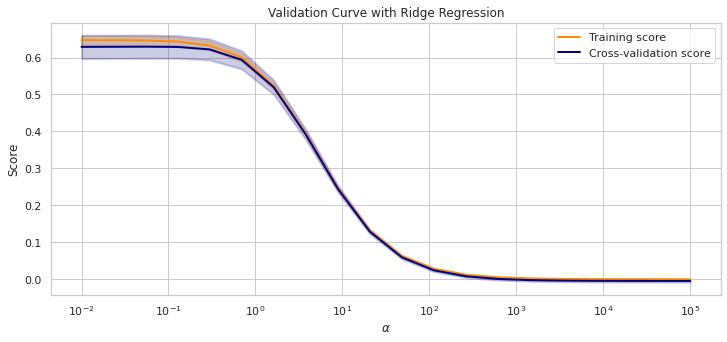

In [103]:
from sklearn.model_selection import validation_curve
param_range= np.logspace(-2, 5, 20)

train_scores, valid_scores = validation_curve(ridge_reg, X_train_ridge, y_train, param_name= "alpha",
                                              param_range= param_range,
                                              cv=3)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)


plt.title("Validation Curve with Ridge Regression")
plt.xlabel(r"$\alpha$")
plt.ylabel("Score")

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [104]:
ridge_reg = linear_model.Ridge(alpha=0.08,normalize = True)
ridge_reg.fit(X_train_ridge, y_train)
ridge_reg = ridge_reg.predict(X_test_ridge)


df_output = pd.DataFrame(ridge_reg)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']
df_output.to_csv('ridge.csv',index=False)

In [105]:
lasso_reg = linear_model.Lasso(tol=0.01, normalize = True) # Create a Ridge regressor
param_grid = [{'alpha': np.logspace(-2, 5, 1000)}]

grid_search_lasso = GridSearchCV(lasso_reg, param_grid, cv=5,scoring="neg_root_mean_squared_error",
                                 return_train_score=True, n_jobs=-1)
grid_search_lasso.fit(X_train_lasso, y_train)
print('Best Score: ', grid_search_lasso.best_score_)
print('Best Params: ', grid_search_lasso.best_params_)

pd.DataFrame(grid_search_lasso.cv_results_)

Best Score:  -398610.82425758586
Best Params:  {'alpha': 0.7548799281653436}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006344,0.000687,0.003532,0.000460,0.01,{'alpha': 0.01},-431121.831163,-440637.418223,-324283.213975,-412426.910732,-384592.291988,-398612.333216,41797.601131,335,-377333.206976,-382071.156200,-402311.641737,-381569.625762,-388917.996335,-386440.725402,8761.169958
1,0.006524,0.000389,0.003729,0.000219,0.0101627,{'alpha': 0.010162650893929946},-431121.834362,-440637.417299,-324283.211283,-412426.911044,-384592.292394,-398612.333276,41797.602394,336,-377333.206976,-382071.156200,-402311.641737,-381569.625763,-388917.996335,-386440.725402,8761.169958
2,0.006782,0.000554,0.003751,0.000171,0.0103279,{'alpha': 0.010327947319189514},-431121.837613,-440637.416359,-324283.208547,-412426.911360,-384592.292806,-398612.333337,41797.603677,337,-377333.206976,-382071.156200,-402311.641737,-381569.625763,-388917.996335,-386440.725402,8761.169958
3,0.007801,0.002276,0.003837,0.000264,0.0104959,{'alpha': 0.010495932305582278},-431121.840917,-440637.415404,-324283.205767,-412426.911682,-384592.293225,-398612.333399,41797.604981,338,-377333.206976,-382071.156200,-402311.641737,-381569.625763,-388917.996335,-386440.725402,8761.169958
4,0.006724,0.000571,0.003691,0.000170,0.0106666,{'alpha': 0.010666649582795394},-431121.844274,-440637.414434,-324283.202941,-412426.912009,-384592.293651,-398612.333462,41797.606306,339,-377333.206976,-382071.156200,-402311.641737,-381569.625763,-388917.996335,-386440.725402,8761.169958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.006269,0.001217,0.003695,0.000303,93750.2,{'alpha': 93750.1501514529},-725679.749916,-639720.505243,-578282.887709,-666554.403663,-640973.119634,-650242.133233,47606.042605,844,-631691.177552,-654452.763244,-668798.360726,-647718.050035,-654138.105125,-651359.691336,12012.542220
996,0.005506,0.000236,0.003625,0.000153,95275,{'alpha': 95275.00472427299},-725679.749916,-639720.505243,-578282.887709,-666554.403663,-640973.119634,-650242.133233,47606.042605,844,-631691.177552,-654452.763244,-668798.360726,-647718.050035,-654138.105125,-651359.691336,12012.542220
997,0.005908,0.000533,0.003706,0.000160,96824.7,{'alpha': 96824.66119303113},-725679.749916,-639720.505243,-578282.887709,-666554.403663,-640973.119634,-650242.133233,47606.042605,844,-631691.177552,-654452.763244,-668798.360726,-647718.050035,-654138.105125,-651359.691336,12012.542220
998,0.006093,0.000255,0.004045,0.000414,98399.5,{'alpha': 98399.52296278227},-725679.749916,-639720.505243,-578282.887709,-666554.403663,-640973.119634,-650242.133233,47606.042605,844,-631691.177552,-654452.763244,-668798.360726,-647718.050035,-654138.105125,-651359.691336,12012.542220


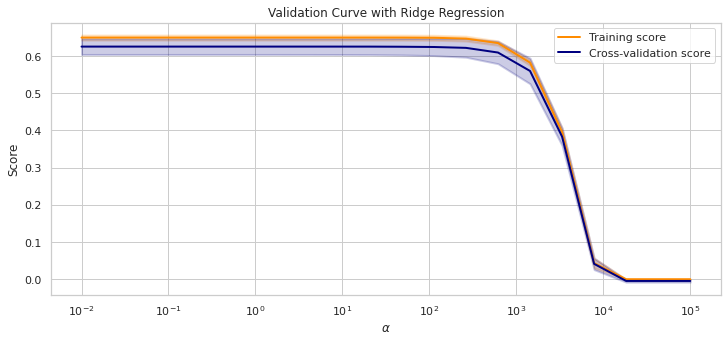

In [106]:
# The same with lasso model
param_range= np.logspace(-2, 5, 20)

train_scores, valid_scores = validation_curve(lasso_reg, X_train_lasso, y_train, param_name= "alpha",
                                              param_range= param_range,
                                              cv=3)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)


plt.title("Validation Curve with Ridge Regression")
plt.xlabel(r"$\alpha$")
plt.ylabel("Score")

lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [107]:
lasso_reg = linear_model.Lasso(tol=0.01,alpha=0.75,normalize = True)
lasso_reg.fit(X_train_lasso, y_train)
lasso_reg = lasso_reg.predict(X_test_lasso)

df_output = pd.DataFrame(lasso_reg)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']
df_output.to_csv('laso.csv',index=False)


El millor model que m'ha donat ha sigut el lasso, he provat a kaggle tant features comunes per als 3 models com diferents models separatas, i el que tinc millor puntuació es el lasso.

In [108]:
## QUESTION: What happens if in the problem of House Prediction Price instead of estimating the price, we estimate the log of the price?

La transformació de les dades les utilitzem per a que el model pugui aprendre millor, aixo significa que si estimem el log del preu haurem després revertir una transformació inversa als resultats del model ja que no s'estimaria al preu de la realitat.

A més, si estudies el model com en aquest cas, per justificar que ha de ser un model lineal i no estimar un valor logaritmic seria que:

- pots veure que la relació entre variables es lineal
- Els errors es distribueixen normalment
- Hi ha una variança es entorn a la linea de regressió amb un error normalment distribuit
- Independencia en les observacions